<a href="https://colab.research.google.com/github/ibombonato/aicrowd-blitz-faceimages/blob/main/FineTuneFastAI_FaceImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HuggingPics ü§óüñºÔ∏è

Fine-tune Vision Transformers for **anything** using images found on the web.

In [ ]:
!nvidia-smi

In [ ]:
!pip install --upgrade fastai --quiet

In [3]:
! pip install transformers pytorch-lightning --quiet

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.5 MB 13.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 527 kB 48.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67 kB 4.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 17.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 53.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.8 MB 55.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 829 kB 35.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 397 kB 15.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

## AiCrowd Setup

In [4]:
!pip install aicrowd-cli --quiet

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50 kB 4.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 55.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 214 kB 46.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 170 kB 52.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 54 kB 2.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 1.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 1.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 51 kB 3.7 MB/s 
ERROR: pip's dependency resolver d

In [1]:
%load_ext aicrowd.magic
%aicrowd login

Please login here: https://api.aicrowd.com/auth/-P1-C_dAZt1GCqX1pGfcf4awa40PTCUfziSMgIc4RQ8
API Key valid
Gitlab access token valid
Saved details successfully!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Ai Crowd Dataloader

In [3]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c age-prediction -o data

sample_submission.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

test.zip:   0%|          | 0.00/176M [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/236M [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

val.zip:   0%|          | 0.00/117M [00:00<?, ?B/s]

In [4]:
!unzip data/train.zip -d data/train > /dev/null
!unzip data/val.zip -d data/val > /dev/null
!unzip data/test.zip -d data/test > /dev/null

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm.auto import tqdm
tqdm.pandas()

In [6]:
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/val.csv")
test_df = pd.read_csv("data/sample_submission.csv")

## Adjust Images from folders

Here, we loop over images and split into separated folders by label

In [7]:
from pathlib import Path
import os
import shutil 

def create_dirs(labels, splits):
  for split in splits:
    for label in labels:
      os.makedirs(f"/content/images/{split}/{label}/", exist_ok=True)

def image_to_label_folder(img_name, label_directory, split_directory):
  origin = Path(f"/content/data/{split_directory}/{img_name}.jpg")
  target = Path(f"/content/images/{split_directory}/{label_directory}/{img_name}.jpg")
  shutil.copy(origin, target)

In [8]:
labels = train_df.age.unique()

In [9]:
create_dirs(labels, ["train", "val"])

In [ ]:
#!rm -r /content/lightning_logs

In [10]:
def move_images(df, split):
  df.progress_apply(lambda x: image_to_label_folder(x["ImageID"],x["age"], split), axis=1)

In [11]:
move_images(train_df, "train")
move_images(val_df, "val")

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

## Init Dataset and Split into Training and Validation Sets


In [14]:
import torch

In [15]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [17]:
from fastai.vision.all import *
path = '/content/images'

dls = ImageDataLoaders.from_folder(
    path, train='train', valid='val', item_tfms=Resize(224), 
                                        batch_tfms=aug_transforms(size=224))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0006918309954926372)

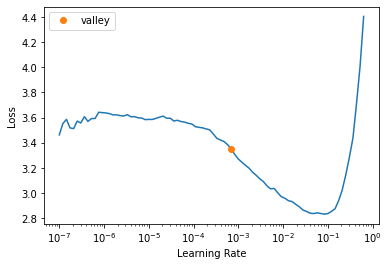

In [18]:
learn = cnn_learner(dls, resnet101, metrics=[error_rate, accuracy]).to_fp16()
learn.lr_find()

In [19]:
learn.fit_one_cycle(10, 0.0006918309954926372)

SuggestedLRs(valley=3.630780702224001e-05)

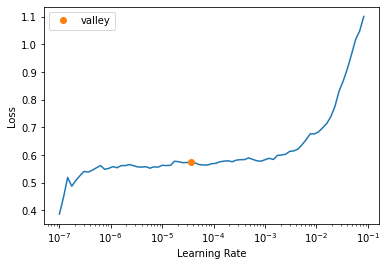

In [20]:
learn.lr_find()

In [21]:
learn.fine_tune(10, 3.630780702224001e-05)

SuggestedLRs(valley=1.3182567499825382e-06)

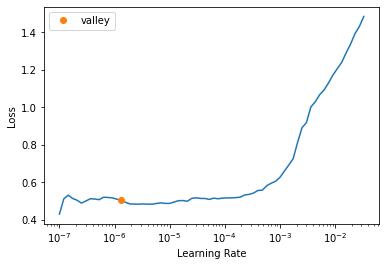

In [22]:
learn.lr_find()

In [28]:
learn.fine_tune(10, 2.0892961401841603e-05)

SuggestedLRs(valley=2.0892961401841603e-05)

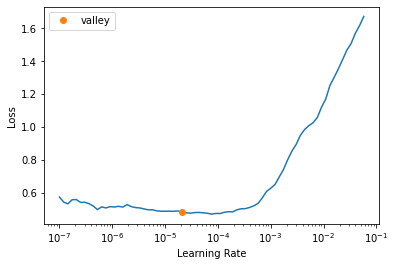

In [27]:
learn.lr_find()

In [29]:
test_df['image'] = test_df['ImageID'].apply(lambda x: f"/content/data/test/{x}.jpg")

test_dl_df = dls.test_dl(test_df['image'])

preds_test_df = learn.get_preds(dl=test_dl_df)
labelled_preds = [learn.dls.vocab[pred.argmax()] for pred in preds_test_df[0]]

In [30]:
for pred in preds_test_df[0]:
  print(tensor(pred))
  break

TensorBase([2.2994e-09, 9.6401e-11, 4.0648e-13, 4.5619e-12, 2.3759e-12, 1.3432e-12,
        4.7808e-12, 3.3066e-09, 1.9638e-06, 1.0000e+00])


In [ ]:
learn.dls.vocab

['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

In [31]:
test_df['age_pred_resnet101'] = [pred for pred in preds_test_df[0]]

In [32]:
import pathlib
FILES_PATH = "/content/drive/MyDrive/models/vit-age-classifier/"
FILE_NAME = "emsenble_20220222_221749.csv"
file_path = pathlib.Path(FILES_PATH, FILE_NAME)
df_ensemble = pd.read_csv(file_path)
df_ensemble.head()

ImageID  ...                                                                                                                              age_pred_resnet34
0   8rti7  ...  TensorBase([8.8940e-07, 1.2117e-08, 5.3352e-09, 1.3465e-08, 1.2403e-09, 2.2111e-09,\n        1.9361e-09, 4.5110e-08, 1.0111e-04, 9.9990e-01])
1   575pj  ...  TensorBase([1.4766e-01, 3.9670e-01, 4.4603e-01, 9.3296e-03, 2.7709e-04, 2.8055e-06,\n        4.2856e-07, 3.2155e-08, 7.2180e-08, 8.1008e-07])
2   6ma92  ...  TensorBase([9.6116e-01, 3.8753e-02, 8.5436e-05, 8.8445e-07, 3.3969e-08, 4.0809e-09,\n        3.9399e-09, 4.6970e-09, 9.0892e-09, 8.7937e-08])
3   jtu3e  ...  TensorBase([2.9232e-05, 5.7046e-04, 1.4937e-02, 5.0835e-01, 4.1815e-01, 5.5714e-02,\n        2.0433e-03, 1.9724e-04, 5.8353e-06, 1.8148e-06])
4   svx4s  ...                                          TensorBase([0.0009, 0.0083, 0.0536, 0.1288, 0.5739, 0.1625, 0.0075, 0.0556, 0.0053,\n        0.0036])

[5 rows x 5 columns]

In [33]:
df_ensemble = pd.merge(df_ensemble, test_df[['ImageID', 'age_pred_resnet101']])
df_ensemble.head()

ImageID  ...                                                                                                                                                                                                                            age_pred_resnet101
0   8rti7  ...  [TensorBase(2.2994e-09), TensorBase(9.6401e-11), TensorBase(4.0648e-13), TensorBase(4.5619e-12), TensorBase(2.3759e-12), TensorBase(1.3432e-12), TensorBase(4.7808e-12), TensorBase(3.3066e-09), TensorBase(1.9638e-06), TensorBase(1.0000)]
1   575pj  ...          [TensorBase(0.9913), TensorBase(0.0081), TensorBase(0.0006), TensorBase(2.2717e-05), TensorBase(2.4464e-06), TensorBase(3.3761e-07), TensorBase(5.5122e-07), TensorBase(1.4836e-07), TensorBase(3.3494e-08), TensorBase(2.7613e-06)]
2   6ma92  ...      [TensorBase(0.6039), TensorBase(0.3960), TensorBase(6.0648e-05), TensorBase(1.4138e-06), TensorBase(1.6724e-06), TensorBase(1.0322e-07), TensorBase(2.5626e-06), TensorBase(2.7226e-06), TensorBase(8.5573e-08), TensorBase(2.3654e-06)]
3   jtu3e  ...                      [TensorBase(1.5246e-05), TensorBase(0.0024), TensorBase(0.2185), TensorBase(0.6678), TensorBase(0.1078), TensorBase(0.0033), TensorBase(0.0002), TensorBase(2.9387e-05), TensorBase(2.2661e-06), TensorBase(1.1067e-05)]
4   svx4s  ...                              [TensorBase(1.7456e-05), TensorBase(2.1222e-05), TensorBase(0.0031), TensorBase(0.1584), TensorBase(0.7240), TensorBase(0.0825), TensorBase(0.0230), TensorBase(0.0085), TensorBase(0.0002), TensorBase(0.0002)]

[5 rows x 6 columns]

In [34]:
df_ensemble.to_csv(file_path, index=False)